# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [96]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [97]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()



,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [98]:
# domgross is the outcome variable
y=pd_df.budget

X=pd_df.drop(['budget'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)


In [99]:
#Your code here

## Fit a regression model to the training data and look at the coefficients

In [100]:
# Your code 
reg =LinearRegression().fit( X_train, y_train )
reg.coef_

array([ 0.34913524,  0.02290888, -0.70096801,  0.37680462])

In [101]:
y_hat_train= reg.predict(X_train)
print(y_hat_train.shape)
print(y_train.shape)
print(X_train.shape)

(21,)
(21,)
(21, 4)


## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

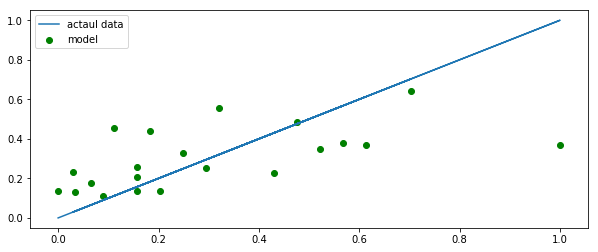

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code herey'-
"""plt.plot (X_train.domgross, y_hat_train)
plt.plot (X_train.domgross, y_train)
plt.scatter(y_train, y_hat_train )"""

plt.figure(figsize=(10, 4))
#plt.subplot(1, 2, 1)
plt.scatter(y_train, reg.predict(X_train), color= "green", label="model")
plt.plot(y_train, y_train, label= "actaul data")

plt.legend()

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

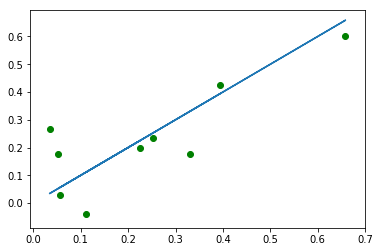

In [103]:
# your code here
plt.scatter(y_test, reg.predict(X_test), color= "green")
plt.plot(y_test, y_test)





## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [104]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)


## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [105]:
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2
    

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [106]:
# code for train set bias and variance
b=bias( y_train, y_hat_train)
v=variance(y_hat_train)
print (b,v)
# Bias: 2.901719268906659e-17 
# Variance: 0.027449331056376085

-1.4538634846281813e-17 0.021970631523791764


In [107]:
# code for test set bias and variance
btest=bias( y_test, reg.predict(X_test))
vtest=variance(reg.predict(X_test))
print(btest,vtest)
# Bias: 0.05760433770819166 
# Variance: 0.009213684542614783

-0.005082919391166797 0.0330229162624595


## Describe in words what these numbers can tell you.

In [ ]:
# Your description here
# bias decrieses and varience insreses in my case. model might be  underfitting


## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly=  PolynomialFeatures(3)

X_fin = poly.fit_transform(X_train)
reg_poly = LinearRegression().fit(X_fin, y_train)
X_test_poly = poly.fit_transform(X_test)
y_hat_train=reg_poly.predict(X_fin)


# your code here

## Plot your overfitted model's training predictions against the actual data

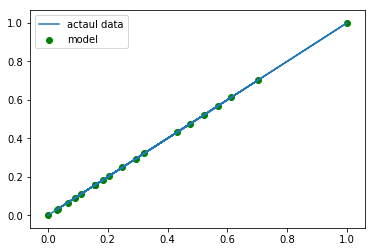

In [128]:
# your code here

plt.scatter(y_train,y_hat_train, color= "green", label="model")
plt.plot(y_train, y_train, label= "actaul data")

plt.legend()






Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [129]:
# your code here
b=bias(y_train, y_hat_train)
v=variance(y_hat_train)
print (b,v)



# Bias: -2.5421584029769207e-16 
# Variance: 0.07230707736656222

9.474894414025703e-16 0.06549523334319238


## Plot your overfitted model's test predictions against the actual data.

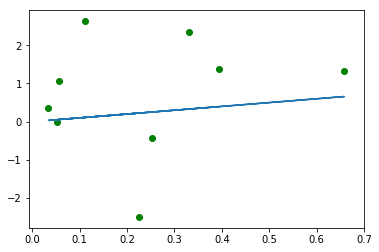

In [131]:
# your code here

plt.scatter(y_test, reg_poly.predict(X_test_poly), color= "green")
plt.plot(y_test, y_test)



##  Calculate the bias and variance for the test set.

In [134]:
# your code here
b=bias(y_test, reg_poly.predict(X_test_poly))
v=variance(reg_poly.predict(X_test_poly))
print (b,v)
# Bias: -0.16998568902304564 
# Variance: 0.3596092440273582

0.4539003702510567 2.1751005678583146


## Describe what you notice about the bias and variance statistics for your overfit model

In [135]:
# Your description here
#bias and varince were very smal in the training model . 
#bias and varience incread in the test data 


## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

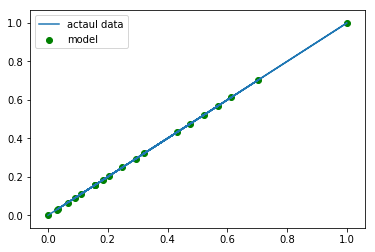

4.237994882213631e-17 0.06549523334319464
1.2104514921260386e-16 0.03717726405618932


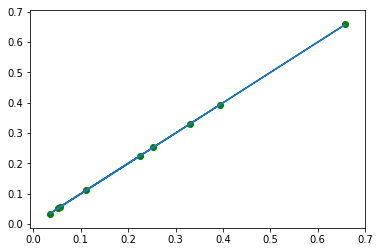

In [155]:


X=pd_df.drop(['imdbRating'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)



poly=  PolynomialFeatures(2)
X_fin = poly.fit_transform(X_train)
reg_poly = LinearRegression().fit(X_fin, y_train)
X_test_poly = poly.fit_transform(X_test)
y_hat_train=reg_poly.predict(X_fin)



plt.figure()
plt.scatter(y_train,y_hat_train, color= "green", label="model")
plt.plot(y_train, y_train, label= "actaul data")
plt.legend()
plt.show()

plt.scatter(y_test, reg_poly.predict(X_test_poly), color= "green")
plt.plot(y_test, y_test)




b=bias(y_train, y_hat_train)
v=variance(y_hat_train)
print (b,v)


b=bias(y_test, reg_poly.predict(X_test_poly))
v=variance(reg_poly.predict(X_test_poly))
print (b,v)


In [ ]:
# I only droppped one column and the model seems working perfect

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 